# **Federal Emergency Management Agency (FEMA)**

## *Exploratory Data Analysis*

1. Comprension del Conjunto de Datos
2. Analisis Univariante
3. Analisis Multivariante
4. Limpieza y transformación de los datos
5. Hipotesis Estádisticas

### *1. Comprension del Conjunto de Datos*

FEMA es un conjunto de datos resumido que describe todos los desastres declarados a nivel federal. Este conjunto de datos enumera todas las Declaraciones Oficiales de Desastre de FEMA, comenzando con el primer registro en 1953, e incluye los tres tipos de declaraciones de desastre: desastre mayor, emergencia y asistencia para el manejo de incendios. El conjunto de datos incluye programas de recuperación declarados y áreas geográficas (el condado no está disponible antes de 1964; los registros de manejo de incendios se consideran parciales debido a la naturaleza histórica del conjunto de datos).

- **femaDeclarationString:** Agency standard method for uniquely identifying Stafford Act declarations - Concatenation of declaration type, disaster number and state code. Ex: DR-4393-NC

- **disasterNumber:** Sequentially assigned number used to designate an event or incident declared as a disaster.

- **state:** The name or phrase describing the U.S. state, district, or territory
- **declarationType:** Two character code that defines if this is a major disaster, fire management, or emergency declaration.
- **declarationDate:** Date the disaster was declared
- **fyDeclared:** Fiscal year in which the disaster was declared
- **incidentType:** Type of incident such as fire or flood. 
- **declarationTitle:** Title for the disaster
- **ihProgramDeclared:** Denotes whether the Individuals and Households program was declared for this disaster.
- **iaProgramDeclared:** Denotes whether the Individual Assistance program was declared for this disaster. 
- **paProgramDeclared:** Denotes whether the Public Assistance program was declared for this disaster.
- **hmProgramDeclared:** Denotes whether the Hazard Mitigation program was declared for this disaster.
- **incidentBeginDate:** Date the incident itself began
- **incidentEndDate:** Date the incident itself ended
- **disasterCloseoutDate:** Date all financial transactions for all programs are completed
- **fipsStateCode:** FIPS two-digit numeric code used to identify the United States, the District of Columbia, US territories, outlying areas of the US and freely associated states
- **fipsCountyCode:** FIPS three-digit numeric code used to identify counties and county equivalents in the United States, the District of Columbia, US territories, outlying areas of the US and freely associated states
- **placeCode:** A unique code system FEMA uses internally to recognize locations that takes the numbers '99' + the 3-digit county FIPS code.
- **designatedArea:** The name or phrase describing the geographic area that was included in the declaration
- **declarationRequestNumber:** Number assigned to the declaration request
- **lastIAFilingDate:** Last date when IA requests can be filed. Data available after 1998 only. The date only applies if IA has been approved for the disaster.
- **lastRefresh:** Date the record was last updated in the API data store
- **hash:** MD5 Hash of the fields and values of the record
- **id:** Unique ID assigned to the record



In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../files/DisasterDeclarationsSummaries.csv')
data.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5457-OR,5457,OR,FM,2023-01-27T00:00:00.000Z,2023,Fire,CEDAR CREEK FIRE,False,False,...,NaN,41,39,99039,Lane (County),23009,NaN,2023-03-18T13:22:03.304Z,230fec119f882c28f1018bffe2b3d10dcc940c26,49440dd5-6591-4b32-b0ce-2298c56ec557
1,FM-5456-WA,5456,WA,FM,2022-10-17T00:00:00.000Z,2023,Fire,NAKIA CREEK FIRE,False,False,...,NaN,53,11,99011,Clark (County),22097,NaN,2023-03-18T13:22:03.304Z,78715856edcde8ba49b759d89933b25b4bb200e6,d3336e70-a497-4311-9e0d-55c51ba3fb1d
2,FM-5456-WA,5456,WA,FM,2022-10-17T00:00:00.000Z,2023,Fire,NAKIA CREEK FIRE,False,False,...,NaN,53,59,99059,Skamania (County),22097,NaN,2023-03-18T13:22:03.304Z,4a129aebbc92b695cdfed18144aa711c5c950058,5bb43a61-f3f3-4f16-9c33-2f4c8cb32b83
3,FM-5455-WA,5455,WA,FM,2022-09-10T00:00:00.000Z,2022,Fire,BOLT CREEK FIRE,False,False,...,NaN,53,33,99033,King (County),22083,NaN,2023-03-18T13:22:03.304Z,893a7fb7eded478ebb74d5f2cc5694946a95ab10,9c21dc79-7e0f-417c-804a-2cda09d1ca95
4,FM-5455-WA,5455,WA,FM,2022-09-10T00:00:00.000Z,2022,Fire,BOLT CREEK FIRE,False,False,...,NaN,53,61,99061,Snohomish (County),22083,NaN,2023-03-18T13:22:03.304Z,3c1fc234fc831a9b6be3e7b9ffdade9eaeb70b5b,be57ac19-25a1-455c-9077-250b9b31325b


In [3]:
print(f'El conjunto de datos presenta un tamaño de [{data.shape}] y una cantidad de duplicidades de {data.duplicated().sum()}.')  

El conjunto de datos presenta un tamaño de [(64285, 24)] y una cantidad de duplicidades de 0.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64285 entries, 0 to 64284
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     64285 non-null  object
 1   disasterNumber            64285 non-null  int64 
 2   state                     64285 non-null  object
 3   declarationType           64285 non-null  object
 4   declarationDate           64285 non-null  object
 5   fyDeclared                64285 non-null  int64 
 6   incidentType              64285 non-null  object
 7   declarationTitle          64285 non-null  object
 8   ihProgramDeclared         64285 non-null  bool  
 9   iaProgramDeclared         64285 non-null  bool  
 10  paProgramDeclared         64285 non-null  bool  
 11  hmProgramDeclared         64285 non-null  bool  
 12  incidentBeginDate         64285 non-null  object
 13  incidentEndDate           63701 non-null  object
 14  disasterCloseoutDate  

In [5]:
print(f'{data.describe()} \n\nAsí mismo, la cantidad de valores nulos es la siguiente: \n{data.isnull().sum()}')

       disasterNumber    fyDeclared  fipsStateCode  fipsCountyCode   
count    64285.000000  64285.000000   64285.000000    64285.000000  \
mean      2583.568842   2004.396018      31.578844       97.359104   
std       1408.379726     14.798339      16.629509      102.593807   
min          1.000000   1953.000000       1.000000        0.000000   
25%       1318.000000   1997.000000      19.000000       31.000000   
50%       3068.000000   2007.000000      30.000000       75.000000   
75%       3549.000000   2018.000000      46.000000      127.000000   
max       5464.000000   2023.000000      78.000000      840.000000   

          placeCode  declarationRequestNumber  
count  64285.000000              64285.000000  
mean   96379.707039              34989.910539  
std    13923.534419              34909.790916  
min        0.000000                  3.000000  
25%    99029.000000               8156.000000  
50%    99073.000000              20027.000000  
75%    99123.000000              

Mediante un gráfico circular podemos tener una mejor representación de como se distribuyen los datos en referencia a unas variables clave

In [6]:
fig = px.sunburst(data, path=['declarationType','incidentType'], width=800, height=800,title='Clasificación de los registros de FEMA',color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

### *Analisis Univariante : IncidentType*

En primer lugar, es necesario realizar ciertas transofrmaciones de tipo de variable dentro de nuestro conjunto de datos

In [7]:
# Datetime

date_cols = data.filter(like='Date').columns.to_list()

for i in range(len(date_cols)):
    data[str(date_cols[i])] = pd.to_datetime(data[str(date_cols[i])])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64285 entries, 0 to 64284
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   femaDeclarationString     64285 non-null  object             
 1   disasterNumber            64285 non-null  int64              
 2   state                     64285 non-null  object             
 3   declarationType           64285 non-null  object             
 4   declarationDate           64285 non-null  datetime64[ns, UTC]
 5   fyDeclared                64285 non-null  int64              
 6   incidentType              64285 non-null  object             
 7   declarationTitle          64285 non-null  object             
 8   ihProgramDeclared         64285 non-null  bool               
 9   iaProgramDeclared         64285 non-null  bool               
 10  paProgramDeclared         64285 non-null  bool               
 11  hmProgramDeclar

Ahora, nos interesa conocer la matriz de correlaciones de nuestro conjunto de datos. Para ello, eliminaremos de nuestro modelo para este ejercicio las columnas que no sean relevantes de cara a un análisis y realizaremos transformacion a dummy de aquellas variables susceptibles de serlo. 

In [20]:

#Eliminamos de las variables string las que no aplican de cara al análisis
deprecated_cols = ['femaDeclarationString','declarationTitle','designatedArea','lastRefresh', 'hash', 'id','state']

aux = data.select_dtypes(include=object)
aux = aux.drop(deprecated_cols, axis=1)

data_dummies = data.select_dtypes(include=['bool','int64','object'])
data_dummies = data_dummies.drop(deprecated_cols, axis=1)

col = list(aux.columns.values)

# #Transformamos a dummy 
data_dummies = pd.get_dummies(data_dummies, columns=col, drop_first=True)
data_dummies.head()


,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,...,incidentType_Severe Storm,incidentType_Snowstorm,incidentType_Terrorist,incidentType_Tornado,incidentType_Toxic Substances,incidentType_Tropical Storm,incidentType_Tsunami,incidentType_Typhoon,incidentType_Volcanic Eruption,incidentType_Winter Storm
0,5457,2023,False,False,True,True,41,39,99039,23009,...,False,False,False,False,False,False,False,False,False,False
1,5456,2023,False,False,True,True,53,11,99011,22097,...,False,False,False,False,False,False,False,False,False,False
2,5456,2023,False,False,True,True,53,59,99059,22097,...,False,False,False,False,False,False,False,False,False,False
3,5455,2022,False,False,True,True,53,33,99033,22083,...,False,False,False,False,False,False,False,False,False,False
4,5455,2022,False,False,True,True,53,61,99061,22083,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

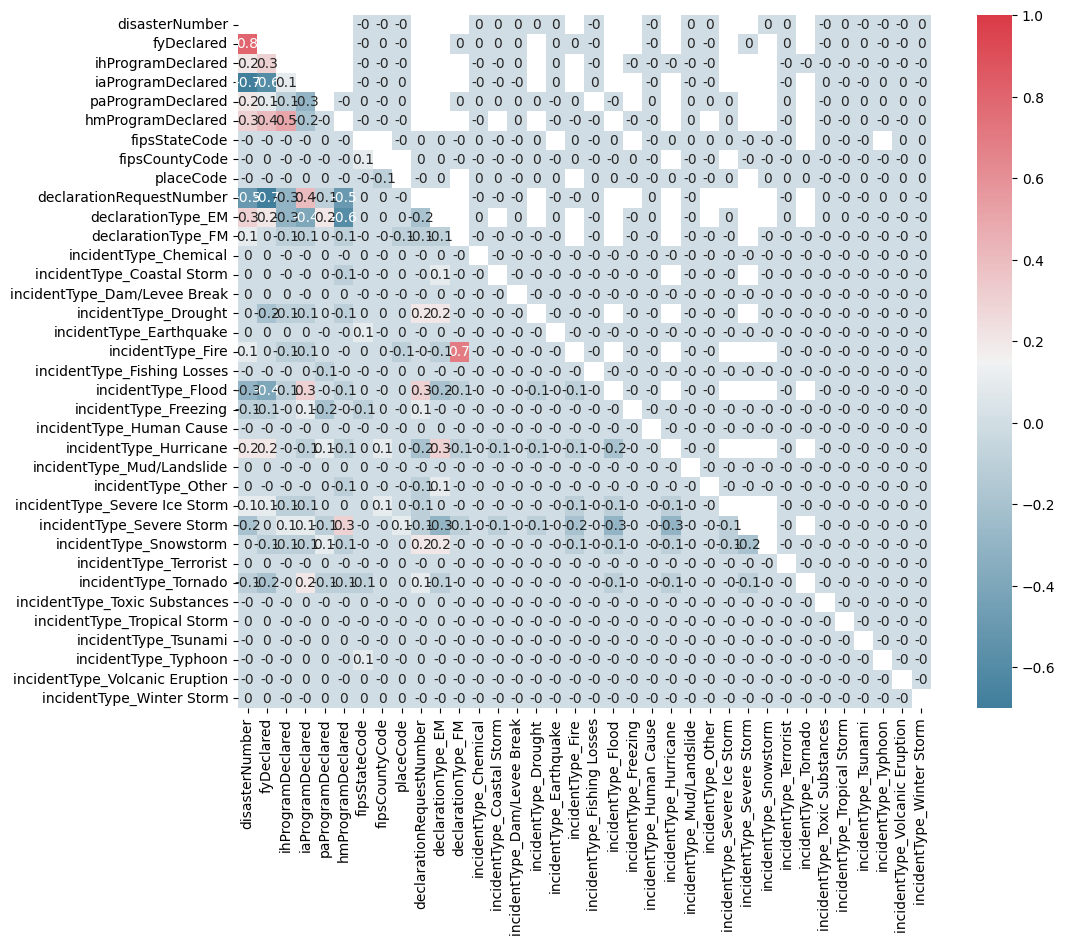

In [21]:
cmap = sns.diverging_palette(230,10, as_cmap=True)

corrmat = data_dummies.corr()
corrmat = np.round(corrmat,1)

mask = np.triu(corrmat)

f, axs = plt.subplots(figsize=(12,9))
sns.heatmap(
    data=corrmat,
    vmax=1,
    mask=mask,
    cmap=cmap,
    square=True,
    annot=True,
)


In [38]:
corrmat = corrmat.mask(np.eye(len(corrmat),dtype=bool))

columns_aux = []

for index,row in corrmat.iterrows():
    if np.round(row.sum(),0) != 0:
        columns_aux.append(row.name)
    else:
        pass

columns_aux


['iaProgramDeclared',
 'hmProgramDeclared',
 'declarationRequestNumber',
 'declarationType_EM',
 'incidentType_Flood',
 'incidentType_Hurricane',
 'incidentType_Severe Storm',
 'incidentType_Tornado']

In [36]:
corrmat.mask(np.eye(len(corrmat),dtype=bool))

,disasterNumber,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsStateCode,fipsCountyCode,placeCode,declarationRequestNumber,...,incidentType_Severe Storm,incidentType_Snowstorm,incidentType_Terrorist,incidentType_Tornado,incidentType_Toxic Substances,incidentType_Tropical Storm,incidentType_Tsunami,incidentType_Typhoon,incidentType_Volcanic Eruption,incidentType_Winter Storm
disasterNumber,NaN,0.8,0.2,-0.7,0.2,0.3,-0.0,-0.0,-0.0,-0.5,...,-0.2,0.0,0.0,-0.1,-0.0,0.0,-0.0,-0.0,-0.0,0.0
fyDeclared,0.8,NaN,0.3,-0.6,0.1,0.4,-0.0,0.0,-0.0,-0.7,...,0.0,-0.1,0.0,-0.2,-0.0,0.0,0.0,-0.0,-0.0,0.0
ihProgramDeclared,0.2,0.3,NaN,0.1,-0.1,0.5,-0.0,-0.0,-0.0,-0.3,...,0.1,-0.1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
iaProgramDeclared,-0.7,-0.6,0.1,NaN,-0.3,-0.2,-0.0,-0.0,0.0,0.4,...,0.1,-0.1,-0.0,0.2,0.0,-0.0,-0.0,0.0,0.0,-0.0
paProgramDeclared,0.2,0.1,-0.1,-0.3,NaN,-0.0,0.0,-0.0,0.0,-0.1,...,-0.1,0.1,0.0,-0.1,-0.0,0.0,0.0,0.0,0.0,0.0
hmProgramDeclared,0.3,0.4,0.5,-0.2,-0.0,NaN,-0.0,-0.0,-0.0,-0.5,...,0.3,-0.1,-0.0,-0.1,-0.0,-0.0,0.0,-0.0,-0.0,0.0
fipsStateCode,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,NaN,0.1,-0.0,0.0,...,-0.0,-0.0,-0.0,-0.1,0.0,-0.0,-0.0,0.1,0.0,0.0
fipsCountyCode,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.1,NaN,-0.1,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
placeCode,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.1,NaN,-0.0,...,0.1,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
declarationRequestNumber,-0.5,-0.7,-0.3,0.4,-0.1,-0.5,0.0,0.0,-0.0,NaN,...,-0.1,0.2,-0.0,0.1,0.0,-0.0,-0.0,0.0,0.0,-0.0


In [41]:
corrmat[columns_aux]

,iaProgramDeclared,hmProgramDeclared,declarationRequestNumber,declarationType_EM,incidentType_Flood,incidentType_Hurricane,incidentType_Severe Storm,incidentType_Tornado
disasterNumber,-0.7,0.3,-0.5,0.3,-0.3,0.2,-0.2,-0.1
fyDeclared,-0.6,0.4,-0.7,0.2,-0.4,0.2,0.0,-0.2
ihProgramDeclared,0.1,0.5,-0.3,-0.3,-0.1,-0.0,0.1,-0.0
iaProgramDeclared,NaN,-0.2,0.4,-0.4,0.3,-0.1,0.1,0.2
paProgramDeclared,-0.3,-0.0,-0.1,0.2,-0.0,0.1,-0.1,-0.1
hmProgramDeclared,-0.2,NaN,-0.5,-0.6,-0.1,-0.1,0.3,-0.1
fipsStateCode,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.1
fipsCountyCode,-0.0,-0.0,0.0,0.0,-0.0,0.1,-0.0,0.0
placeCode,0.0,-0.0,-0.0,0.0,0.0,0.0,0.1,0.0
declarationRequestNumber,0.4,-0.5,NaN,-0.2,0.3,-0.2,-0.1,0.1
